## Linear regression in Scikit -Learn

Before we implement our linear regression model, we will introduce a new
dataset, the Housing Dataset, which contains information about houses in the
suburbs of Boston collected by D. Harrison and D.L. Rubinfeld in 1978. The Housing
Dataset has been made freely available and can be downloaded from the UCI machine
learning repository at https://archive.ics.uci.edu/ml/machine-learning-databases/housing/

Our goal is to use this data make predictions of the output given the input feature.

We will predict the median value of owner occupied hauses ('MEDV') features such as average number of rooms per dwelling. Since the target variable here is quantitative, this is a regression problem.

In [1]:
import numpy as np
import pandas as pd
df=pd.read_csv('.\housing.csv',header=None,sep='\s+')
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [2]:
col_names=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']
df.columns=col_names
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


## Exploring the housing data

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid',context='notebook')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null int64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null int64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(12), int64(2)
memory usage: 55.4 KB


In [5]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
col=['INDUS','NOX','RM','LSTAT','MEDV']

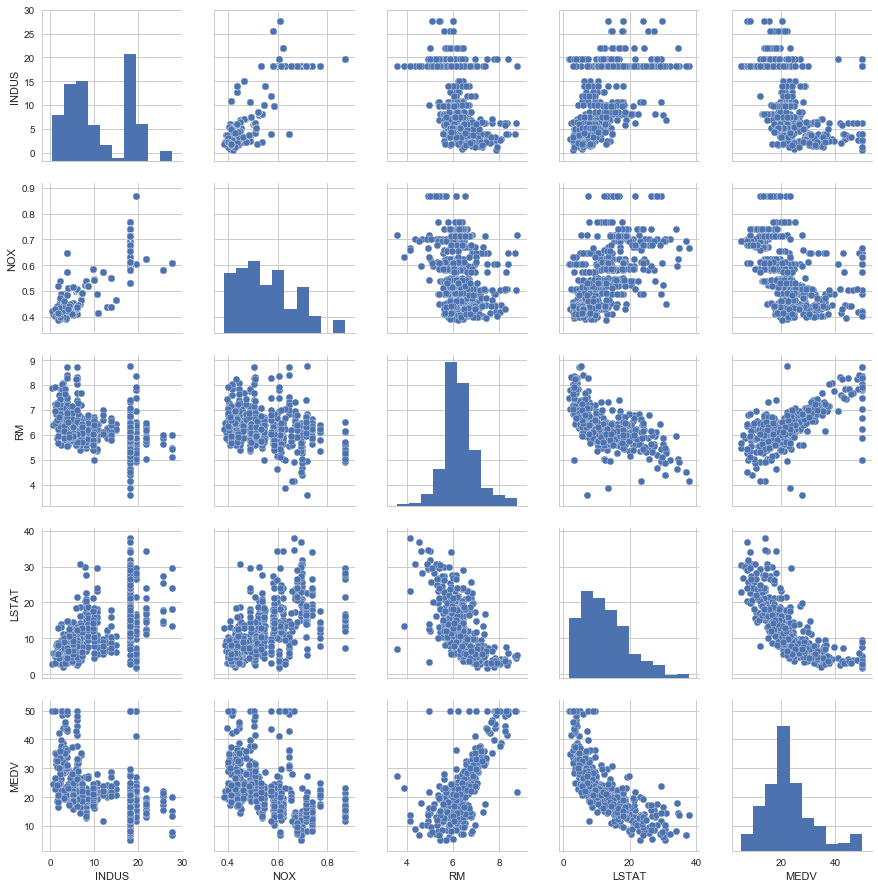

In [7]:
sns.pairplot(df[col],size=2.5)

In [8]:
x=df["RM"].values
y=df["MEDV"].values
print(x.shape)
print(y.shape)

(506,)
(506,)


Before being able to fit our model using scikit-learn library, we need to bring it into the form needed by scikit-learn. This involves creating feature and target variable arrays. Furthermore, since we are going to use only one feature to begin with, we need to do some reshaping using NumPy's .reshape() method. 

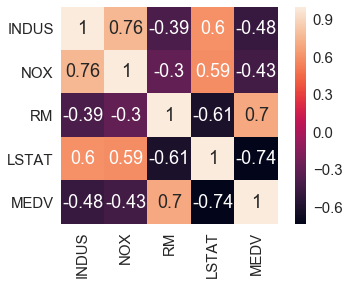

In [9]:
cm=np.corrcoef(df[col].values.T)
sns.set(font_scale=1.5)
hm=sns.heatmap(cm,cbar=True,annot=True,square=True,xticklabels=col,yticklabels=col)

In [10]:
x=x.reshape(-1,1)
y=y.reshape(-1,1)
print(x.shape)
print(y.shape)

(506, 1)
(506, 1)


## Fit & predict for regression

To fit a linear regression model, we are interested in those features that have a high
correlation with our target variable MEDV. Looking at the preceding correlation
matrix, we see that our target variable MEDV shows the largest correlation with
the LSTAT variable (-0.74). The correlation between RM and MEDV is also relatively high (0.70) and
given the linear relationship between those two variables that we observed in the
scatterplot, RM seems to be a good choice for an exploratory variable to introduce
the concepts of a simple linear regression model in the following section.

In [11]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x,y)
#create prediction space
pred_space=np.linspace(min(x),max(x)).reshape(-1,1)
y_pred=lr.predict(pred_space)

In [12]:
print(lr.score(x,y))

0.4835254559913343


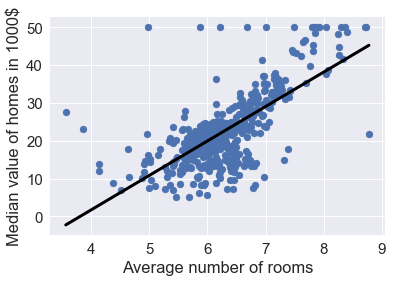

In [13]:
plt.scatter(x,y)
plt.plot(pred_space,y_pred,color='black',linewidth=3)
plt.xlabel('Average number of rooms')
plt.ylabel('Median value of homes in 1000$')

In [14]:
print('Slope: %.3f' % lr.coef_[0])
print('Intercept: %.3f' % lr.intercept_)

Slope: 9.102
Intercept: -34.671


# Train/test split for regression

Train and test sets are vital to ensure that the supervised learning model is able to generalize well to new data. This is equally true for linear regression models, as for classification  models.

In [15]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [16]:
x=df.drop('MEDV',axis=1)
y=df['MEDV'].values

#create training and test sets
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.3, random_state=42)

print(x_train.shape)
print(y_train.shape)

(354, 13)
(354,)


In [17]:
reg_all=LinearRegression()
reg_all.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [18]:
y_pred=reg_all.predict(x_test)

In [19]:
print('R2: {}'.format(reg_all.score(x_test, y_test)))
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error: {}".format(rmse))

R2: 0.7112260057484914
Root Mean Squared Error: 4.638689926172836


# Cross Validation

Cross-validation is a vital step in evaluating a model. It maximizes the amount of data that is used to train the model, as during the course of training, the model is not only trained, but also tested on all of the available data.

In this exercise, we will practice 5-fold cross validation on the *housing* data. By default, scikit-learn's cross_val_score() function uses R2 as the metric of choice for regression. Since we are performing 5-fold cross-validation, the function will return 5 scores. Our job is to compute these 5 scores and then take their average.


In [20]:
from sklearn.model_selection import cross_val_score

In [23]:
reg=LinearRegression()
cv_scores=cross_val_score(reg,x,y,cv=5)
print(cv_scores)
print('Average 5-Fold CV score:{}'.format(np.mean(cv_scores)))

[ 0.63919994  0.71386698  0.58702344  0.07923081 -0.25294154]
Average 5-Fold CV score:0.35327592439587874


# Regularization I: Lasso

Lasso performs regularization by adding to the loss function a penalty term of the absolute value of each coefficient multiplied by some alpha.

In this exercise, we will fit a lasso regression to the housing data we have been working with.

In [28]:
from sklearn.linear_model import Lasso
lasso=Lasso(alpha=0.1, normalize=True)
lasso.fit(x_train,y_train)
lasso_pred=lasso.predict(x_test)
print(lasso.score(x_test,y_test))   #how better is our fitting is. closer to 1 is better

lasso_coef=lasso.coef_
print(lasso_coef)

0.595022953532855
[-0.          0.         -0.          0.         -0.          3.18852894
 -0.         -0.         -0.         -0.         -0.3066901   0.
 -0.48666476]


## Regularization II: Ridge

Lasso is great for feature selection, but when building regression models, Ridge regression should be our first choice.

If instead we took the sum of the squared values of the coefficients multiplied by some alpha - like in Ridge regression - we would be computing the L2 norm. In this task, we will practice fitting ridge regression models over a range of different alphas, and plot cross-validated R2 scores for each.

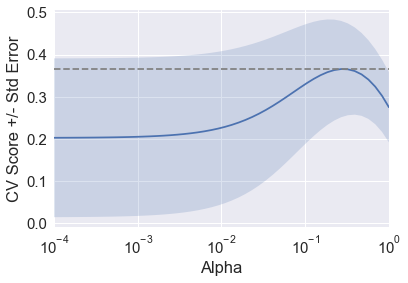

In [31]:
#how we optimize parts
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score 

alpha_space=np.logspace(-4,0,50)
ridge_scores=[]
ridge_scores_std=[]
ridge=Ridge(normalize=True)
for alpha in alpha_space:
    ridge.alpha=alpha
    ridge_cv_scores=cross_val_score(ridge,x,y,cv=10)
    ridge_scores.append(np.mean(ridge_cv_scores))
    ridge_scores_std.append(np.std(ridge_cv_scores))
    
display_plot(ridge_scores,ridge_scores_std)    
    

In [ ]:
#we can see here that somewhere better score when we have 10^-1 and 10^0

In [30]:
def display_plot(cv_scores, cv_scores_std):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)

    std_error = cv_scores_std / np.sqrt(10)

    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.show()